# Analisis ANOVA: Biaya Produk vs. Tingkat Kepentingan

**Tujuan:** Notebook ini akan melakukan analisis ANOVA (Analysis of Variance) untuk menguji apakah terdapat perbedaan rata-rata biaya produk yang signifikan di antara berbagai tingkat kepentingan produk.

**Dataset:** `Train.csv` (E-Commerce Shipping Data)

**Pertanyaan Penelitian:**
"Apakah terdapat perbedaan rata-rata **Biaya Produk (`Cost_of_the_Product`)** yang signifikan berdasarkan tingkat **Kepentingan Produk (`Product_importance`)**?"

**Langkah-langkah:**
1.  **Persiapan:** Impor library dan muat data.
2.  **Eksplorasi & Pembersihan Data:** Memahami dan membersihkan data jika ada nilai yang hilang.
3.  **Pemeriksaan Asumsi ANOVA:** Memastikan data memenuhi syarat untuk analisis.
    * Normalitas
    * Homogenitas Varian
4.  **Uji ANOVA:** Melakukan uji F One-Way ANOVA.
5.  **Interpretasi & Uji Lanjutan (Post-Hoc):** Menganalisis hasil dan mencari tahu grup mana yang berbeda.
6.  **Visualisasi & Kesimpulan:** Membuat plot untuk memperjelas hasil dan menarik kesimpulan.

In [11]:
# Langkah 1: Impor library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Atur style untuk plot agar lebih menarik
sns.set_theme(style="whitegrid")

In [12]:
# Langkah 2: Muat dan Bersihkan Data

# Muat data dari file Train.csv
df = pd.read_csv('Train.csv')

print("Dataset E-Commerce Shipping berhasil dimuat.")
print("Nama kolom yang terdeteksi:", df.columns.tolist())

# Cek nilai yang hilang (jika ada) dan bersihkan.
# Kode ini akan secara otomatis menangani nilai hilang di semua kolom.
print("\nJumlah nilai hilang SEBELUM dibersihkan:")
print(df.isnull().sum())

for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())

print("\nJumlah nilai hilang SETELAH dibersihkan:")
print(df.isnull().sum())

Dataset E-Commerce Shipping berhasil dimuat.
Nama kolom yang terdeteksi: ['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']

Jumlah nilai hilang SEBELUM dibersihkan:
ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Jumlah nilai hilang SETELAH dibersihkan:
ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: i

### Langkah 3: Definisi Variabel & Pemeriksaan Asumsi ANOVA

**Variabel Penelitian:**
- **Variabel Independen (Grup):** `Product_importance`
- **Variabel Dependen (Nilai yang diukur):** `Cost_of_the_Product`

**Asumsi yang akan diuji:**
1.  **Normalitas:** Data `Cost_of_the_Product` untuk setiap grup `Product_importance` terdistribusi normal.
2.  **Homogenitas Varian:** Varians (keragaman data) `Cost_of_the_Product` di semua grup adalah sama.

Uji Normalitas (Shapiro-Wilk) untuk 'Cost_of_the_Product' per Grup:


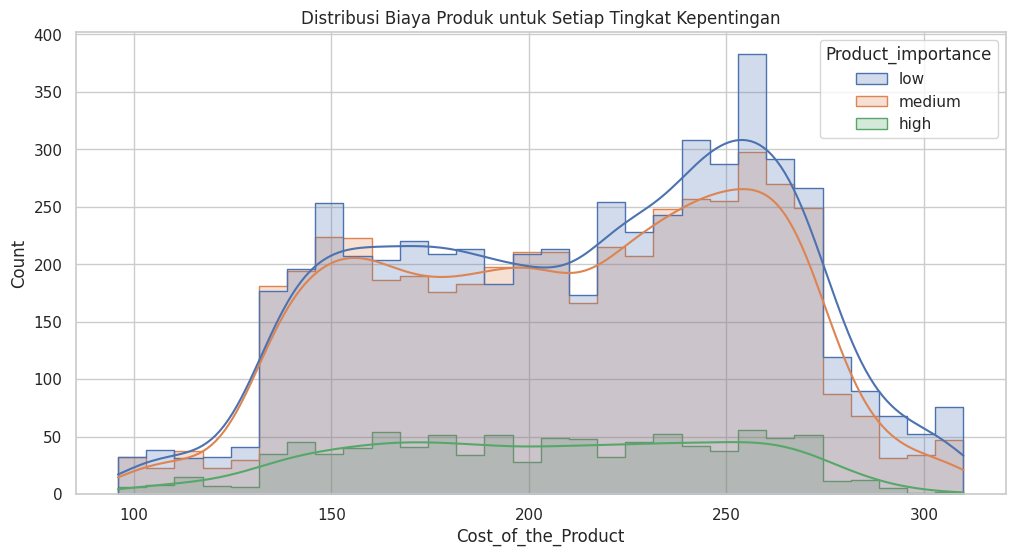


Uji Homogenitas Varian (Levene's Test):
p-value: 0.0833
-> Asumsi homogenitas varian TERPENUHI (p > 0.05).


In [13]:
# Uji Asumsi Normalitas (Shapiro-Wilk)
print("Uji Normalitas (Shapiro-Wilk) untuk 'Cost_of_the_Product' per Grup:")
groups = df['Product_importance'].unique()
groups.sort()

# Visualisasi distribusi untuk konfirmasi
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Cost_of_the_Product', hue='Product_importance', kde=True, element="step")
plt.title('Distribusi Biaya Produk untuk Setiap Tingkat Kepentingan')
plt.show()

# Catatan: Dengan sampel besar, uji visual seringkali lebih informatif.
# ANOVA juga cukup kuat (robust) terhadap pelanggaran asumsi normalitas.

# Uji Asumsi Homogenitas Varian (Levene's Test)
grouped_data = [df[df['Product_importance'] == g]['Cost_of_the_Product'] for g in groups]
stat, p_value_levene = stats.levene(*grouped_data)

print(f"\nUji Homogenitas Varian (Levene's Test):")
print(f"p-value: {p_value_levene:.4f}")

if p_value_levene > 0.05:
    print("-> Asumsi homogenitas varian TERPENUHI (p > 0.05).")
else:
    print("-> Asumsi homogenitas varian TIDAK TERPENUHI (p <= 0.05).")

In [14]:
# Langkah 4 & 5: Uji ANOVA dan Uji Lanjutan (Post-Hoc)

# Hipotesis Nol (H0): Tidak ada perbedaan signifikan antara rata-rata Cost_of_the_Product di semua grup.
# Hipotesis Alternatif (H1): Setidaknya ada satu grup yang rata-ratanya berbeda.

f_statistic, p_value_anova = stats.f_oneway(*grouped_data)

print("Hasil One-Way ANOVA:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value_anova:.10f}")

alpha = 0.05
if p_value_anova < alpha:
    print(f"\nKesimpulan ANOVA: Hasilnya SIGNIFIKAN (p < {alpha}).")
    print("Artinya, TERDAPAT perbedaan rata-rata Biaya Produk yang signifikan berdasarkan tingkat kepentingannya.")

    # Lakukan Uji Post-Hoc Tukey HSD untuk melihat grup mana yang berbeda
    tukey_result = pairwise_tukeyhsd(endog=df['Cost_of_the_Product'], groups=df['Product_importance'], alpha=alpha)

    print("\n---------- Hasil Uji Lanjutan (Tukey HSD) ----------")
    print(tukey_result)

else:
    print(f"\nKesimpulan ANOVA: Hasilnya TIDAK SIGNIFIKAN (p >= {alpha}).")
    print("Artinya, TIDAK ADA perbedaan rata-rata Biaya Produk yang signifikan.")

Hasil One-Way ANOVA:
F-statistic: 12.8997
p-value: 0.0000025369

Kesimpulan ANOVA: Hasilnya SIGNIFIKAN (p < 0.05).
Artinya, TERDAPAT perbedaan rata-rata Biaya Produk yang signifikan berdasarkan tingkat kepentingannya.

---------- Hasil Uji Lanjutan (Tukey HSD) ----------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  high    low   8.1885    0.0  4.2198 12.1573   True
  high medium   5.5111 0.0036  1.5081  9.5141   True
   low medium  -2.6774 0.0145 -4.9258 -0.4291   True
----------------------------------------------------


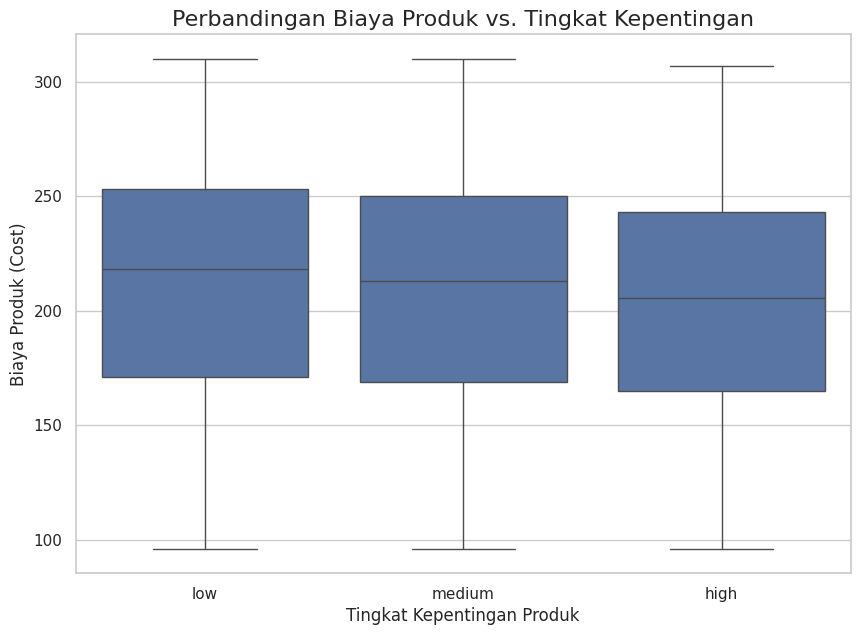

Berdasarkan Box Plot di atas dan hasil uji ANOVA/Tukey, kita dapat melihat bagaimana distribusi biaya produk untuk setiap tingkat kepentingan.
Jika uji Tukey menunjukkan 'reject=True' untuk pasangan tertentu, itu berarti perbedaan rata-rata di antara keduanya signifikan secara statistik.


In [15]:
# Langkah 6: Visualisasi dan Kesimpulan

# Buat Box Plot untuk melihat perbandingan secara visual
plt.figure(figsize=(10, 7))
sns.boxplot(x='Product_importance', y='Cost_of_the_Product', data=df, order=['low', 'medium', 'high'])
plt.title('Perbandingan Biaya Produk vs. Tingkat Kepentingan', fontsize=16)
plt.xlabel('Tingkat Kepentingan Produk', fontsize=12)
plt.ylabel('Biaya Produk (Cost)', fontsize=12)
plt.show()

# Interpretasi Akhir
print("Berdasarkan Box Plot di atas dan hasil uji ANOVA/Tukey, kita dapat melihat bagaimana distribusi biaya produk untuk setiap tingkat kepentingan.")
print("Jika uji Tukey menunjukkan 'reject=True' untuk pasangan tertentu, itu berarti perbedaan rata-rata di antara keduanya signifikan secara statistik.")